## **Aprendizagem a partir de Dados de Doenças do Coração**

In [3]:
import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
from tabulate import tabulate

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap

# bibliotecas para realização de funções relacionadas KNN
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, confusion_matrix
from sklearn import datasets
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler


print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


Base de dados do Kaggle: [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [4]:
# importa o arquivo e guarda em um dataframe do Pandas
data = pd.read_csv( '/content/heart.csv', encoding='iso-8859_1', delimiter=',', index_col=None)

print('Dados importados com sucesso!')
print(data.shape)

Dados importados com sucesso!
(1025, 14)


# Informações iniciais

**Atributos**
1. age
2. sex: 1 = male; 0 = female)
3. cp: chest pain type
        a) Value 1: typical angina
        b) Value 2: atypical angina
        c) Value 3: non-anginal pain
        d) Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the  hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        a) Value 0: normal
        b) Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        c) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        a) Value 1: upsloping
        b) Value 2: flat
        c) Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 = no disease; 1 = disease








In [5]:
# exibe o dataframe

display(data.head(n=10))


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [6]:
data.info()
#display(heart_disease_df.head(n=30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Pré-processamento: eliminação de dados duplicados

In [7]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

data = delDuplicatas( data )

In [8]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# Normalização de alguns atributos, que estão muito fora de escala

In [9]:
def normalizar(X):


    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1) #ddof = delta degrees of freedom

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


# Normalizar algumas colunas
#columns_to_normalize = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca','thal']
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach']
X = data[columns_to_normalize].values
# Chama a função para normalizar
X_norm, mu, sigma = normalizar(X)

data[columns_to_normalize] = X_norm

#Exibe a normalização de algumas colunas
data.describe().round(8)

age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    -0.000000    0.682119    0.963576   -0.000000   -0.000000    0.149007   
std      1.000000    0.466426    1.032044    1.000000    1.000000    0.356686   
min     -2.809529    0.000000    0.000000   -2.140967   -2.328345    0.000000   
25%     -0.709610    0.000000    0.000000   -0.660615   -0.685944    0.000000   
50%      0.119305    1.000000    1.000000   -0.091249   -0.115934    0.000000   
75%      0.727176    1.000000    2.000000    0.478117    0.545857    0.000000   
max      2.495529    1.000000    3.000000    3.894313    6.134852    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490   -0.000000    0.327815    1.043046    1.397351    0.718543   
std      0.526027    1.000000    0.470196    1.161452    0.616274    1.006748   
min      0.000000   -3.430456    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   -0.712534    0.000000    0.000000    1.000000    0.000000   
50%      1.000000    0.127948    0.000000    0.800000    1.000000    0.000000   
75%      1.000000    0.717377    1.000000    1.600000    2.000000    1.000000   
max      2.000000    2.289187    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# Distribuição dos dados com BoxPlot de maneira geral

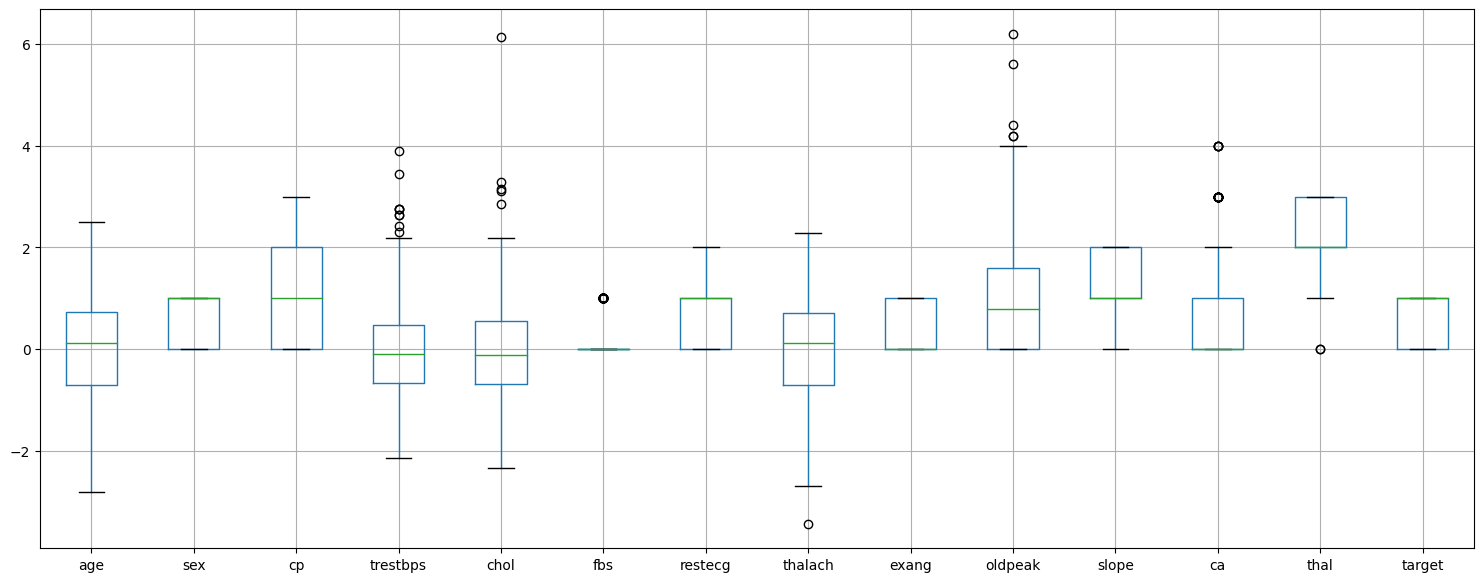

In [10]:
data.boxplot(figsize=(18.5,7))
plt.show()

# Gráfico de dispersão

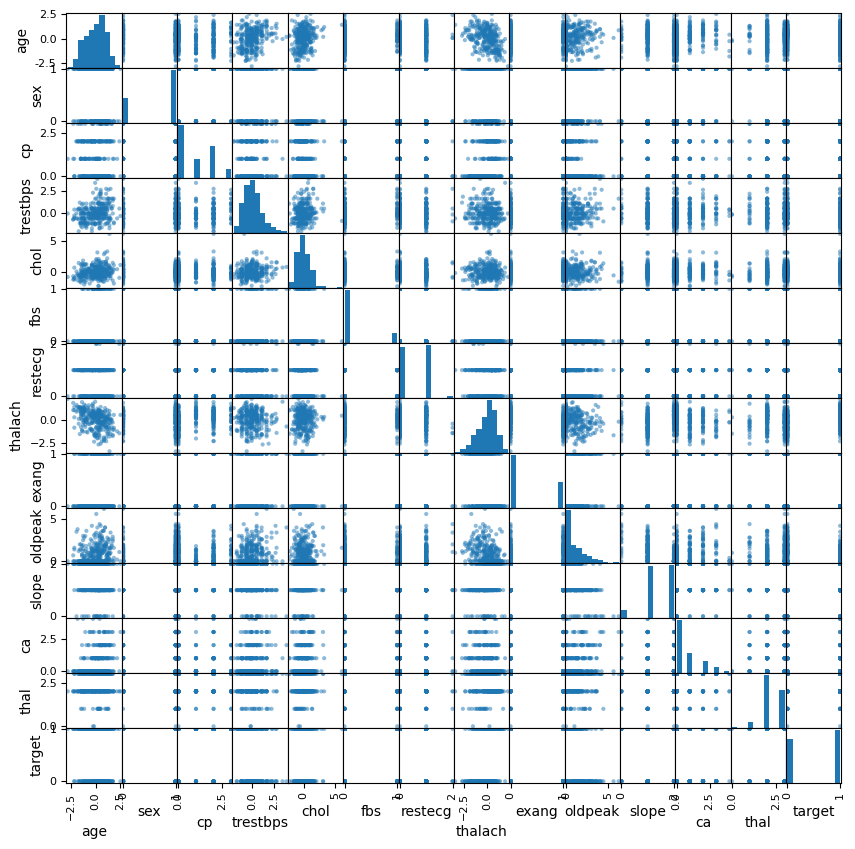

In [11]:
pd.plotting.scatter_matrix(data, figsize=(10,10))

plt.show()

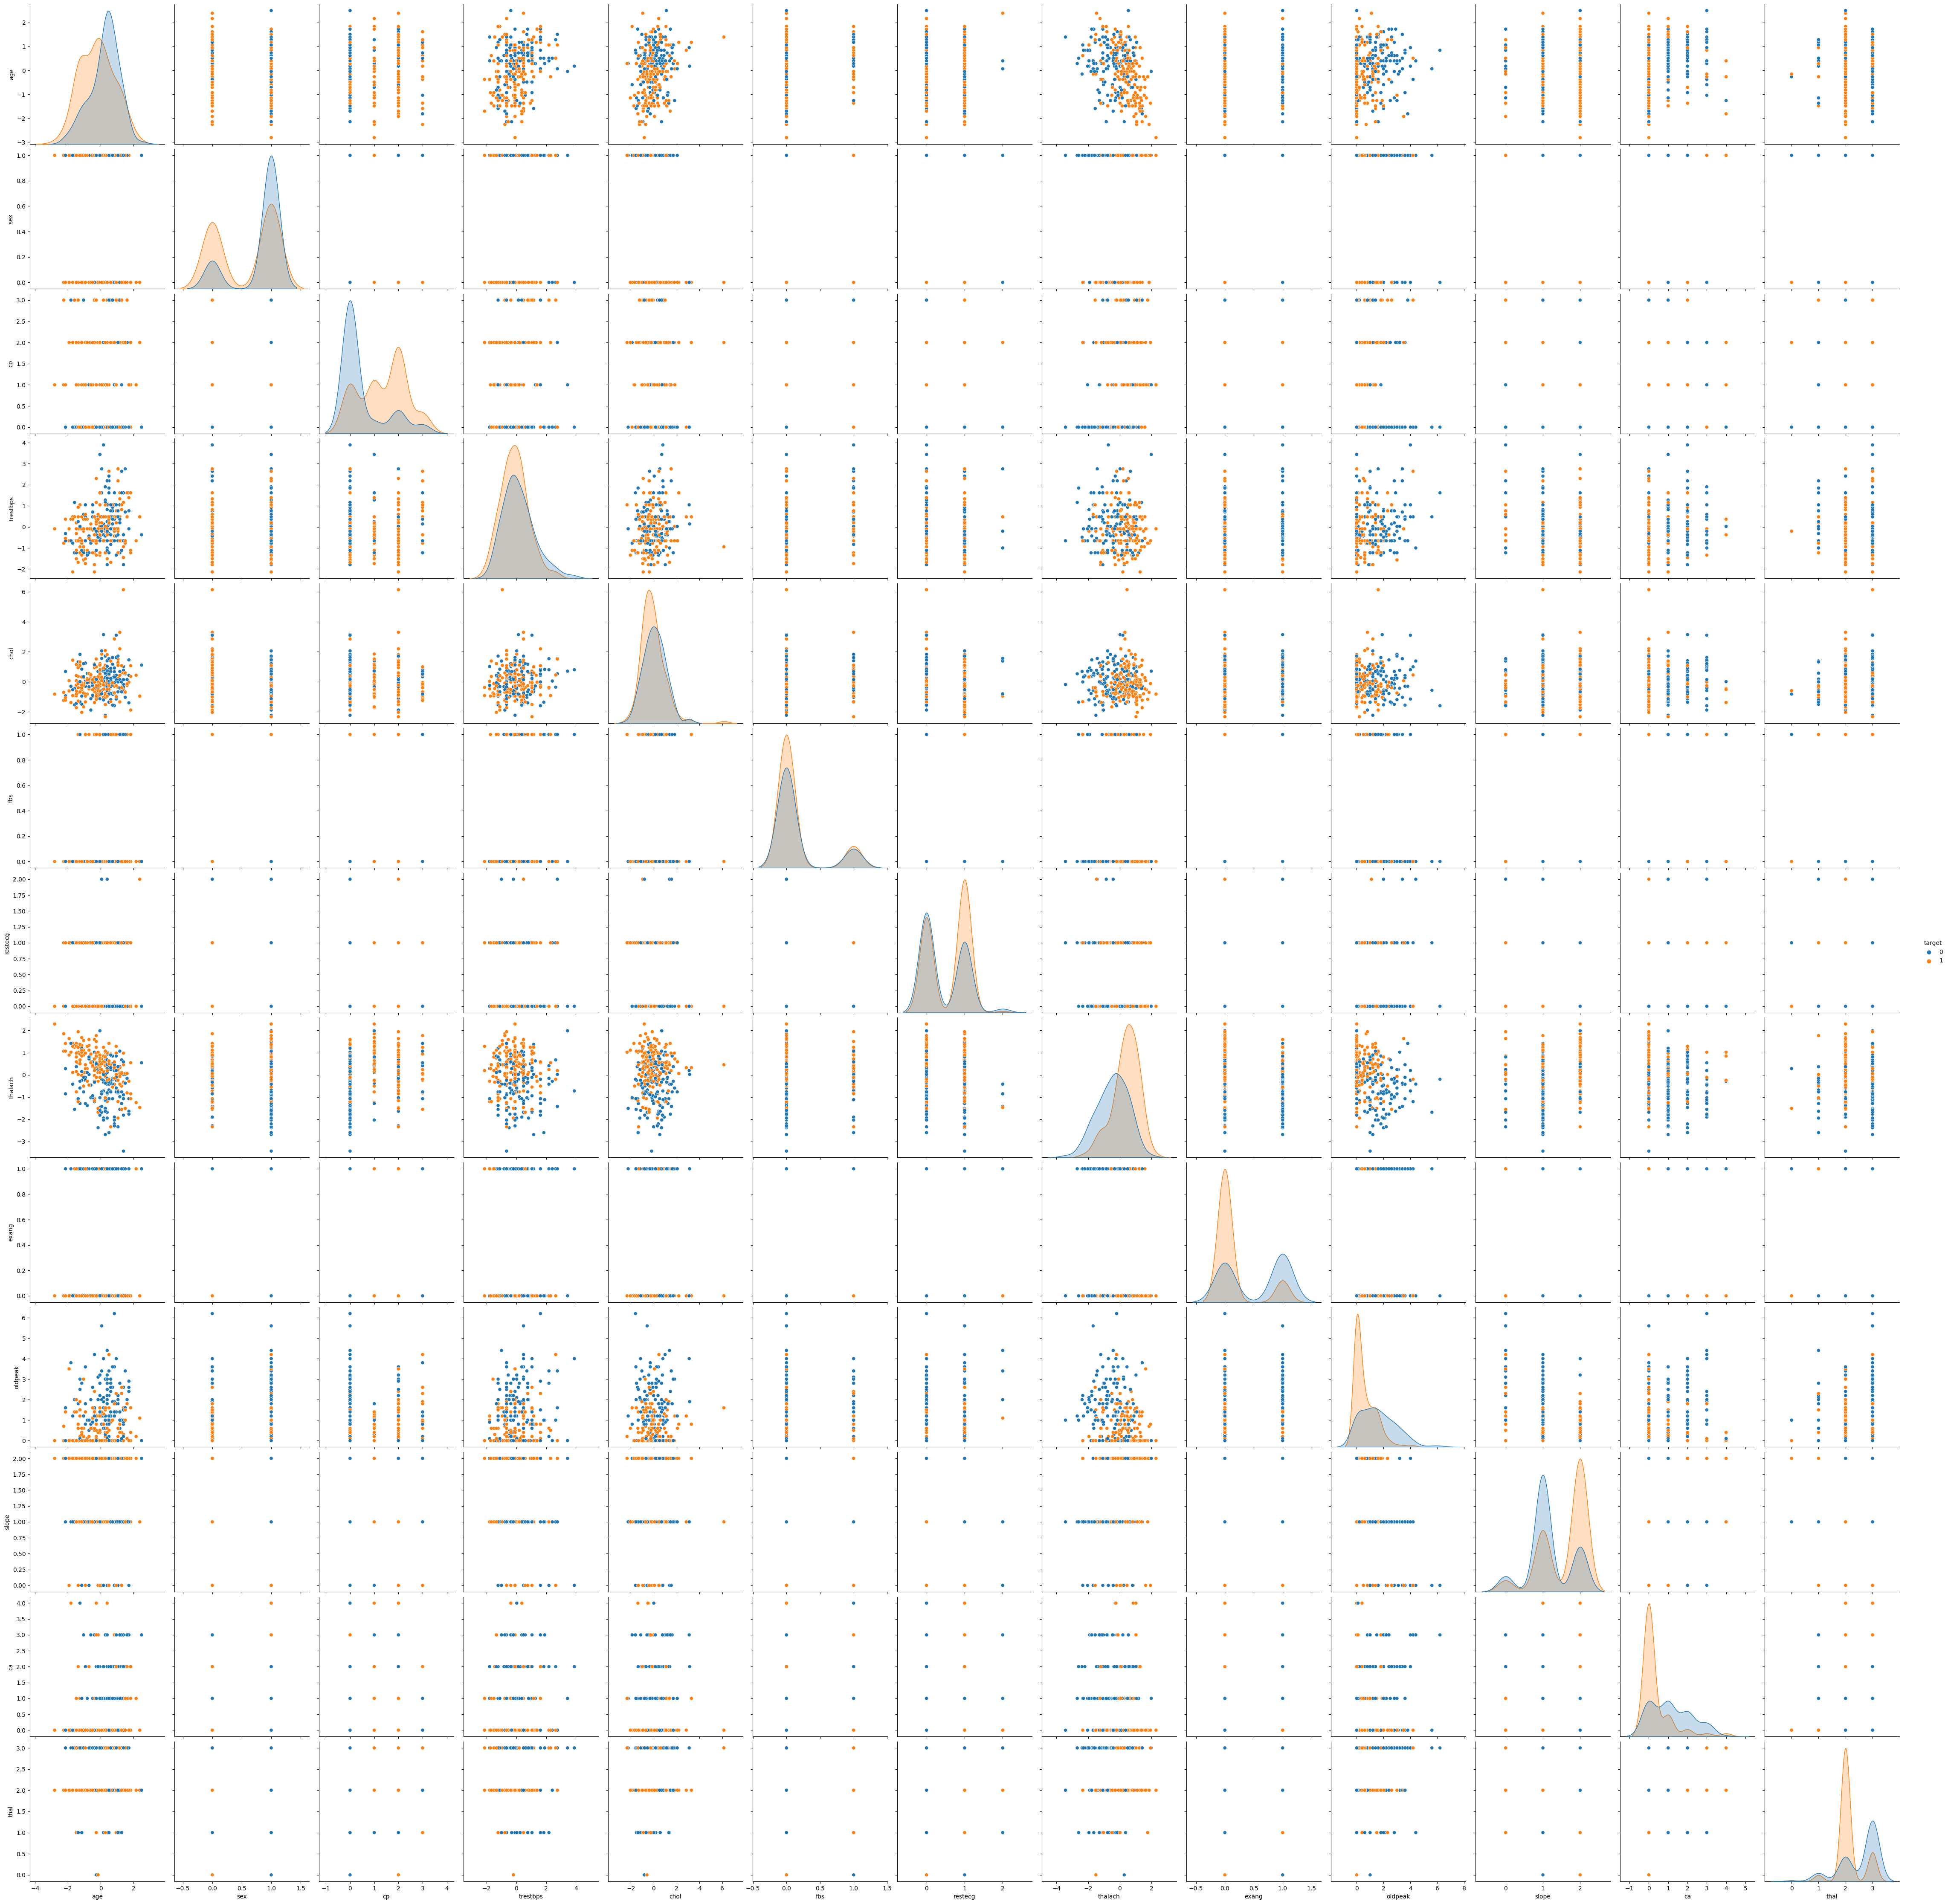

In [12]:
sns.pairplot(data, hue='target', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

# Verificando com BoxPlot cada atributo descritivo em relação ao preditivo

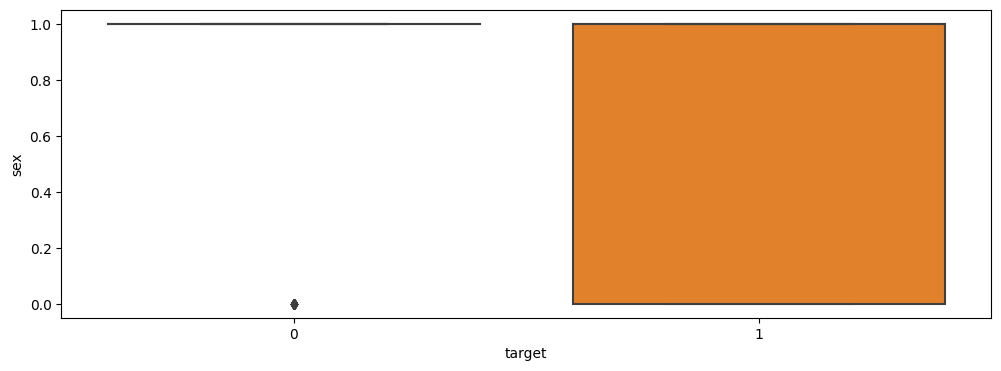

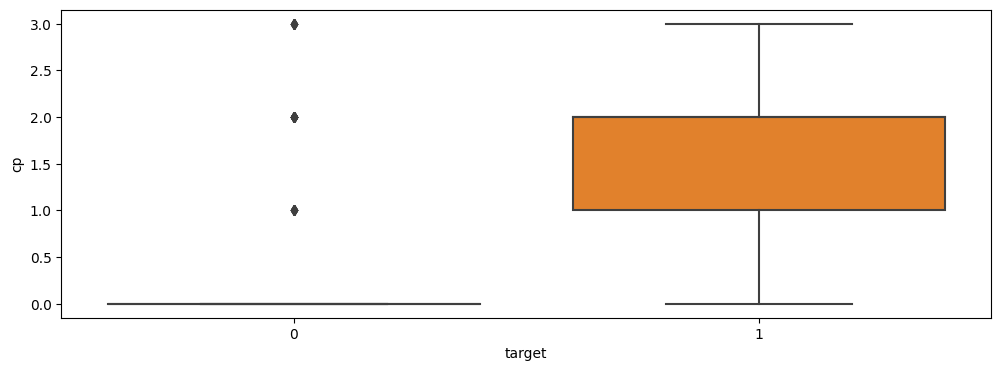

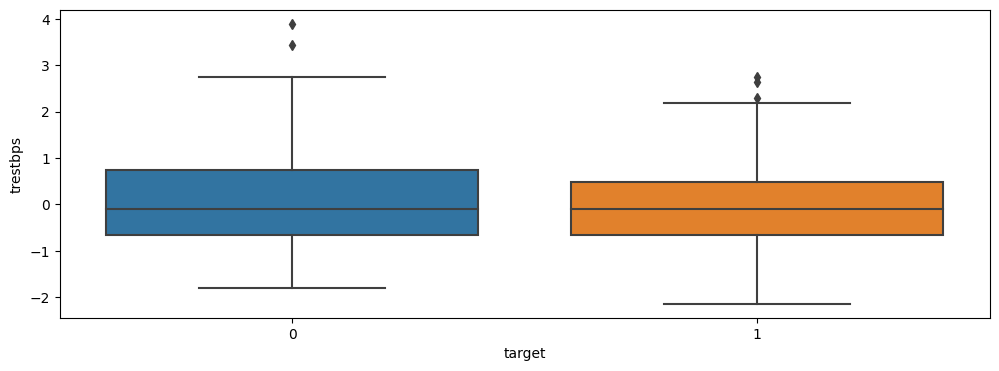

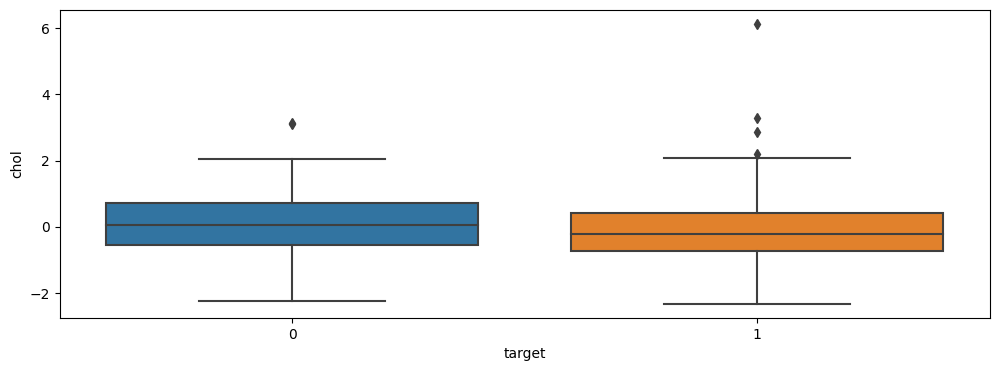

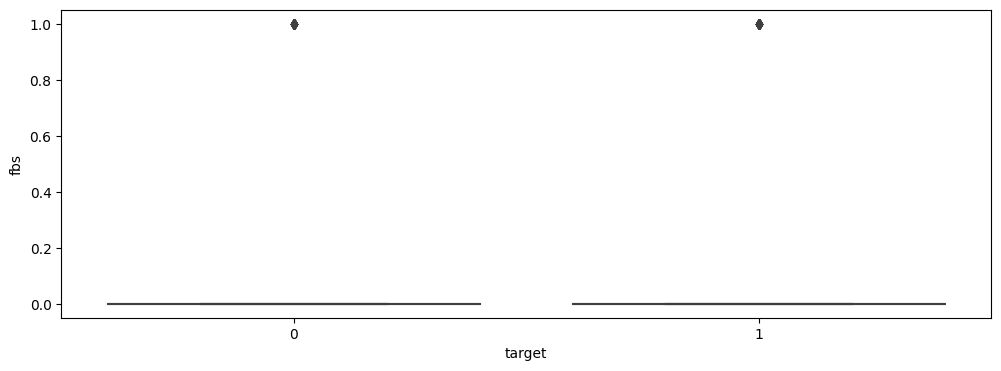

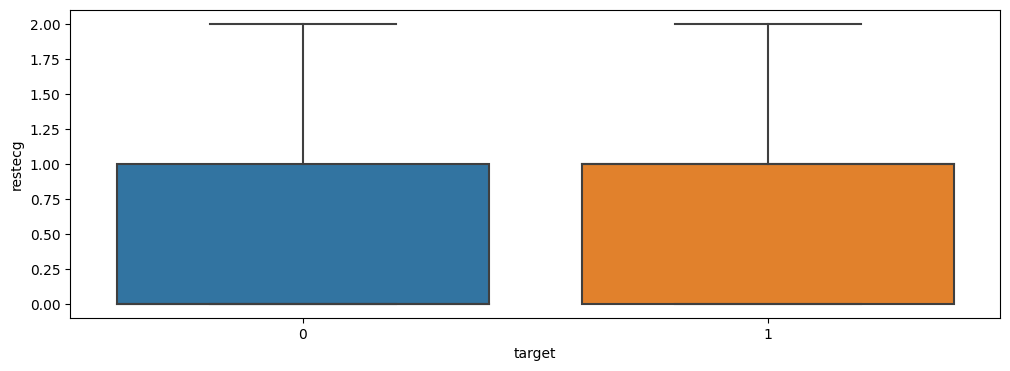

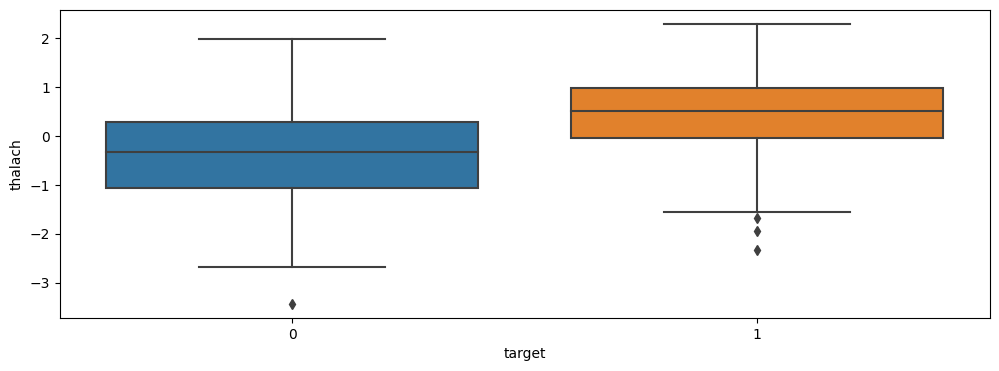

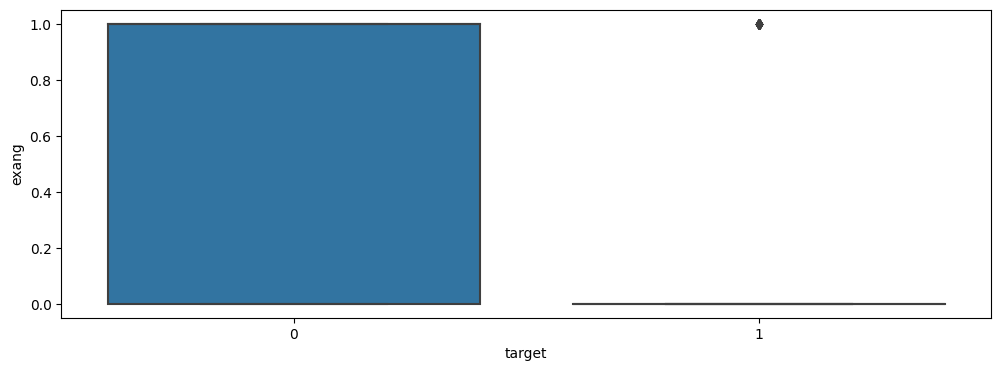

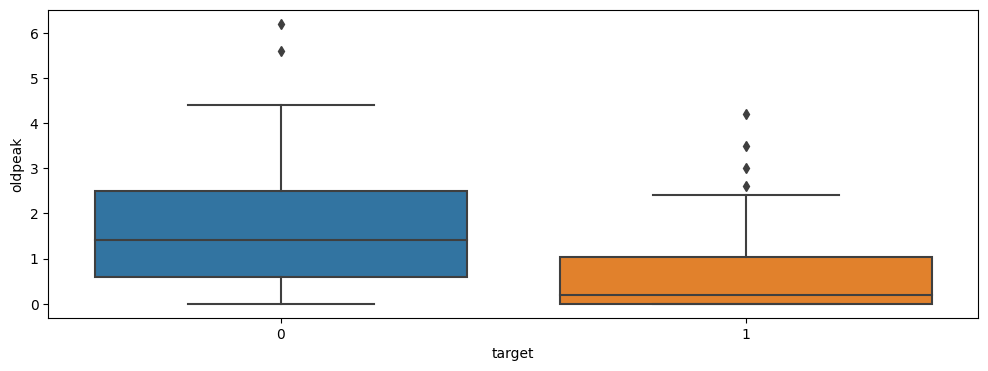

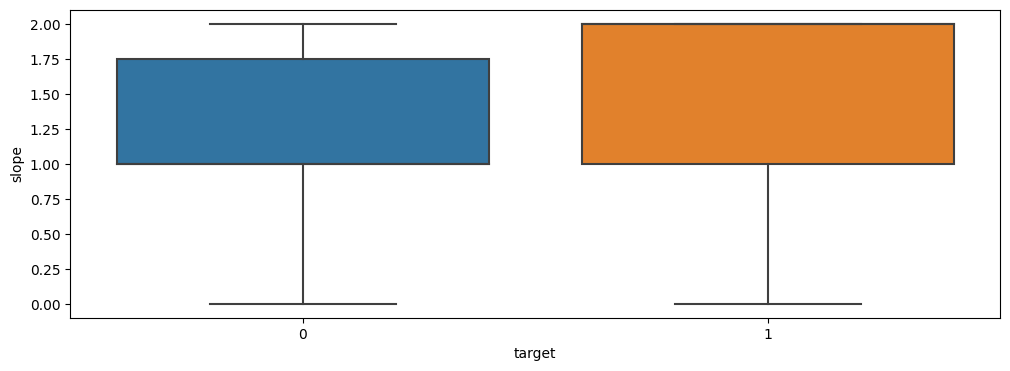

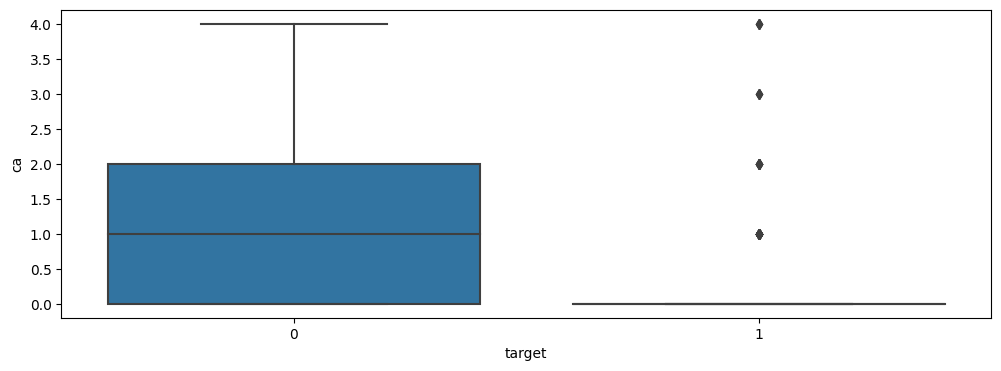

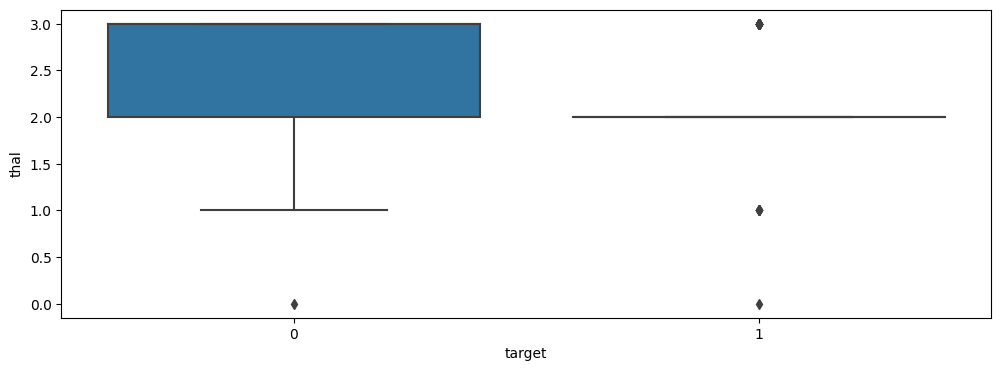

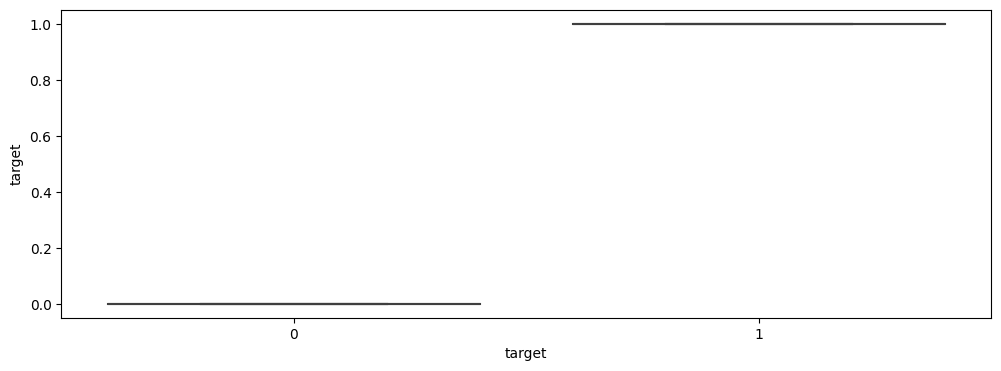

In [13]:
for atributo in data.columns[1:]:
    # define a dimensão do gráfico
    plt.figure(figsize=(12,4))

    # cria o boxplot
    sns.boxplot(x="target", y=atributo, data=data, whis=1.5)

    # mostra o gráfico
    plt.show()

# Contagem da distribuição entre as classes

1    164
0    138
Name: target, dtype: int64

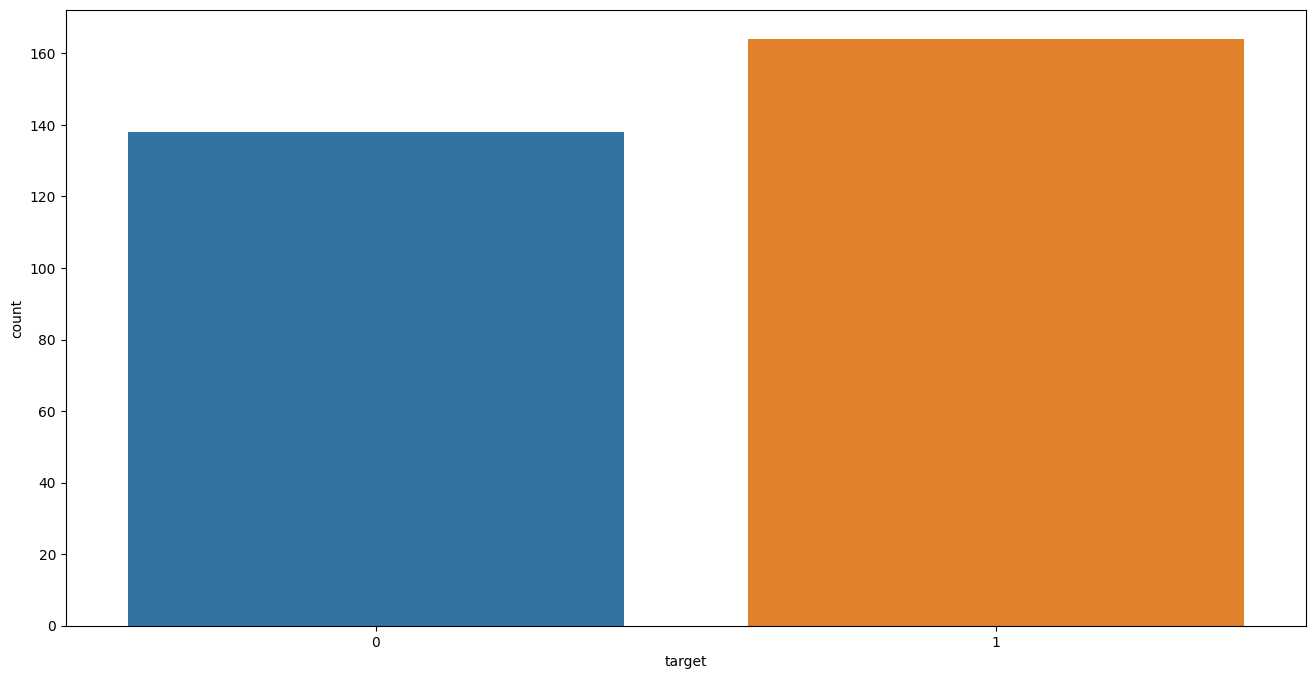

In [14]:
display( data['target'].value_counts() )

# define a dimensão do gráfico
plt.figure(figsize=(16,8))

# cria um gráfico de barras com a frequência de cada player_positions
sns.countplot(x="target", data=data)

# mostra o gráfico
plt.show()

# Covariância e correlação

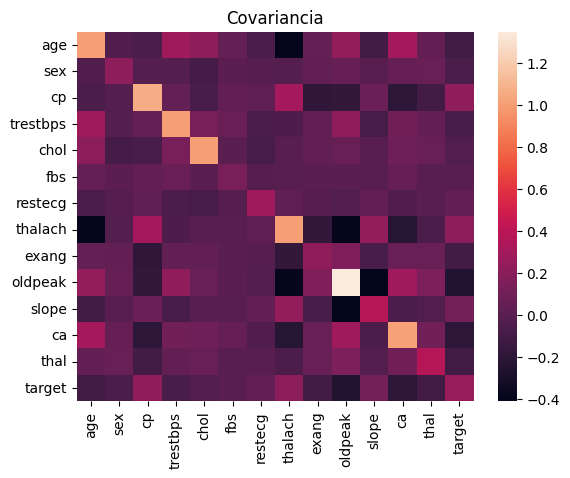

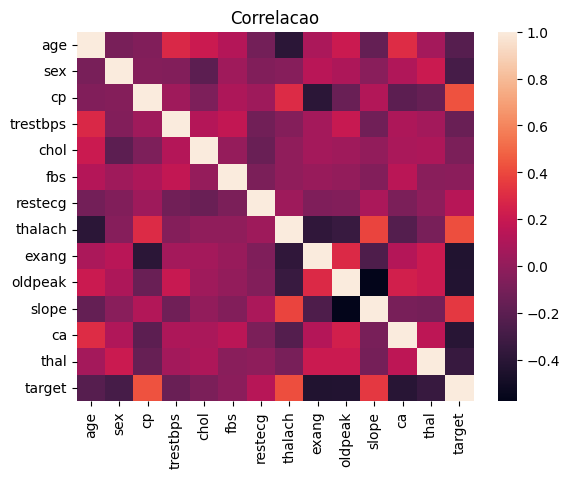

In [15]:
# criando uma matriz X com os valores do data frame
X = data.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

# matriz de covariancia
df_covariance = data.cov()

# matriz de correlação
df_correlation = data.corr()

# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

# Analisando overfitting e underfitting para idade e colesterol com distância Euclideana

(302, 2)


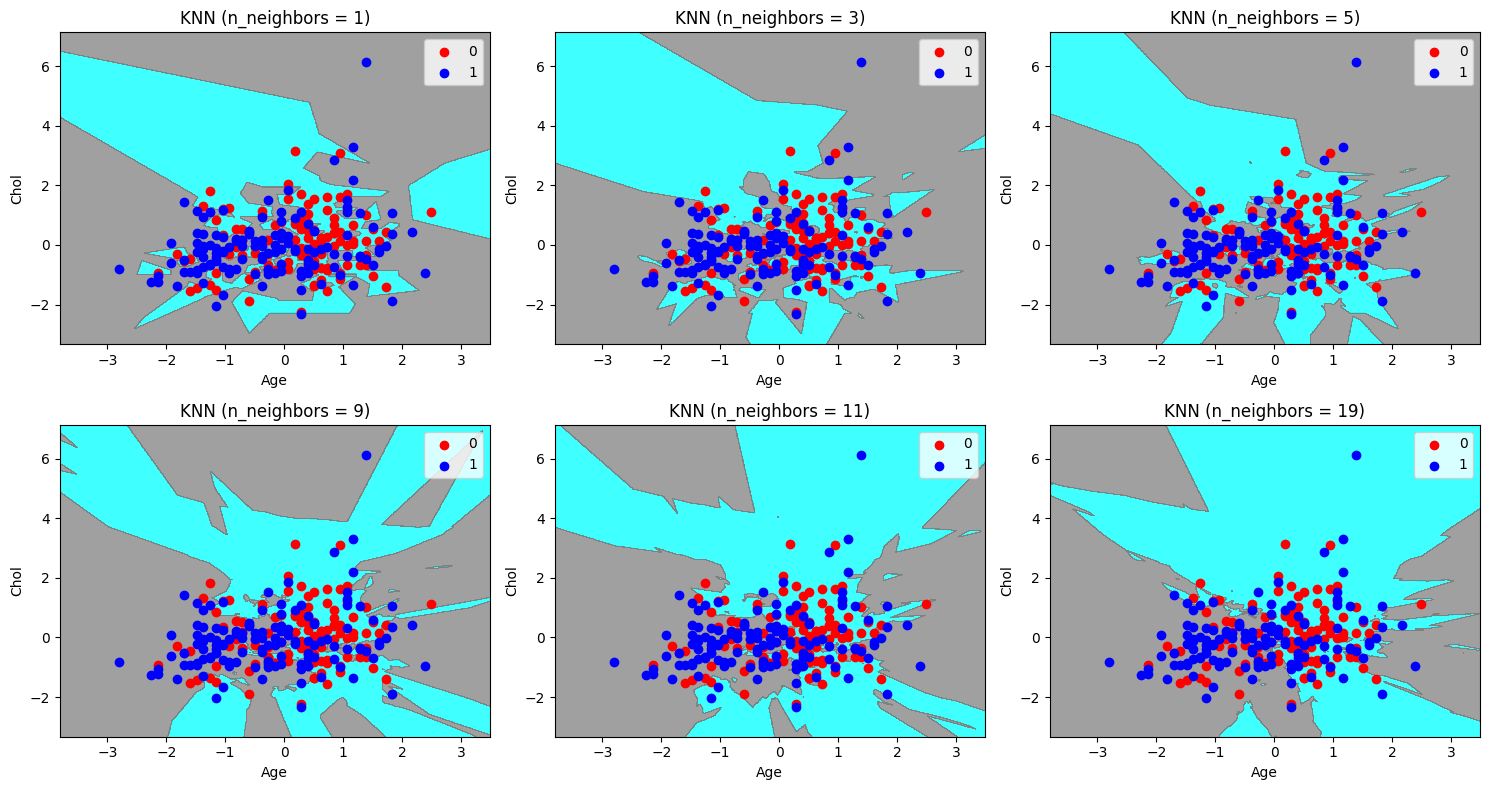

In [16]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, [0,4]].values
print(X.shape)
# Definindo a coluna 8 (Output) como preditivo
y = data.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Define the range of n_neighbors values
n_neighbors_values = [1, 3, 5, 9, 11, 19]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Loop over the n_neighbors values
for i, n_neighbors in enumerate(n_neighbors_values):
    # Create a KNN classifier with the current n_neighbors value
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    classifier.fit(X_train, y_train)

    # Plot the decision boundary
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('cyan', 'gray')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    # Plot the training data points
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Chol')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Analisando overfitting e underfitting para idade e colesterol com distância de Manhattan

(302, 2)


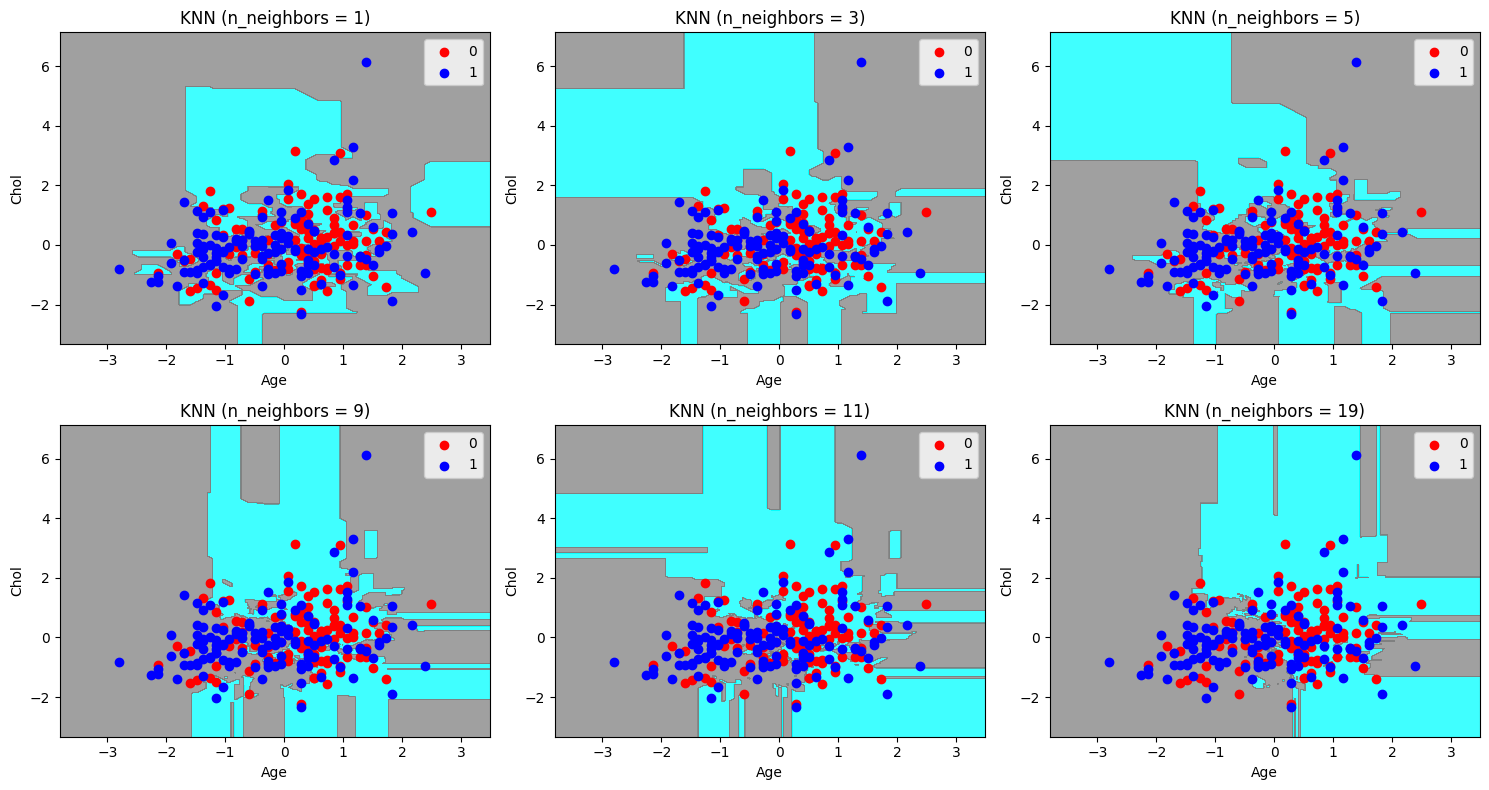

In [17]:
X = data.iloc[:, [0,4]].values
print(X.shape)
# Definindo a coluna 8 (Output) como preditivo
y = data.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Para o KNN
n_neighbors_values = [1, 3, 5, 9, 11, 19]

# Criando subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for i, n_neighbors in enumerate(n_neighbors_values):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="manhattan")
    classifier.fit(X_train, y_train)

    # Criando gráficos para cada valor de k
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('cyan', 'gray')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Chol')
    ax.legend()

plt.tight_layout()

plt.show()

# Analisando overfitting e underfitting para idade e colesterol com distância de Hamming

(302, 2)


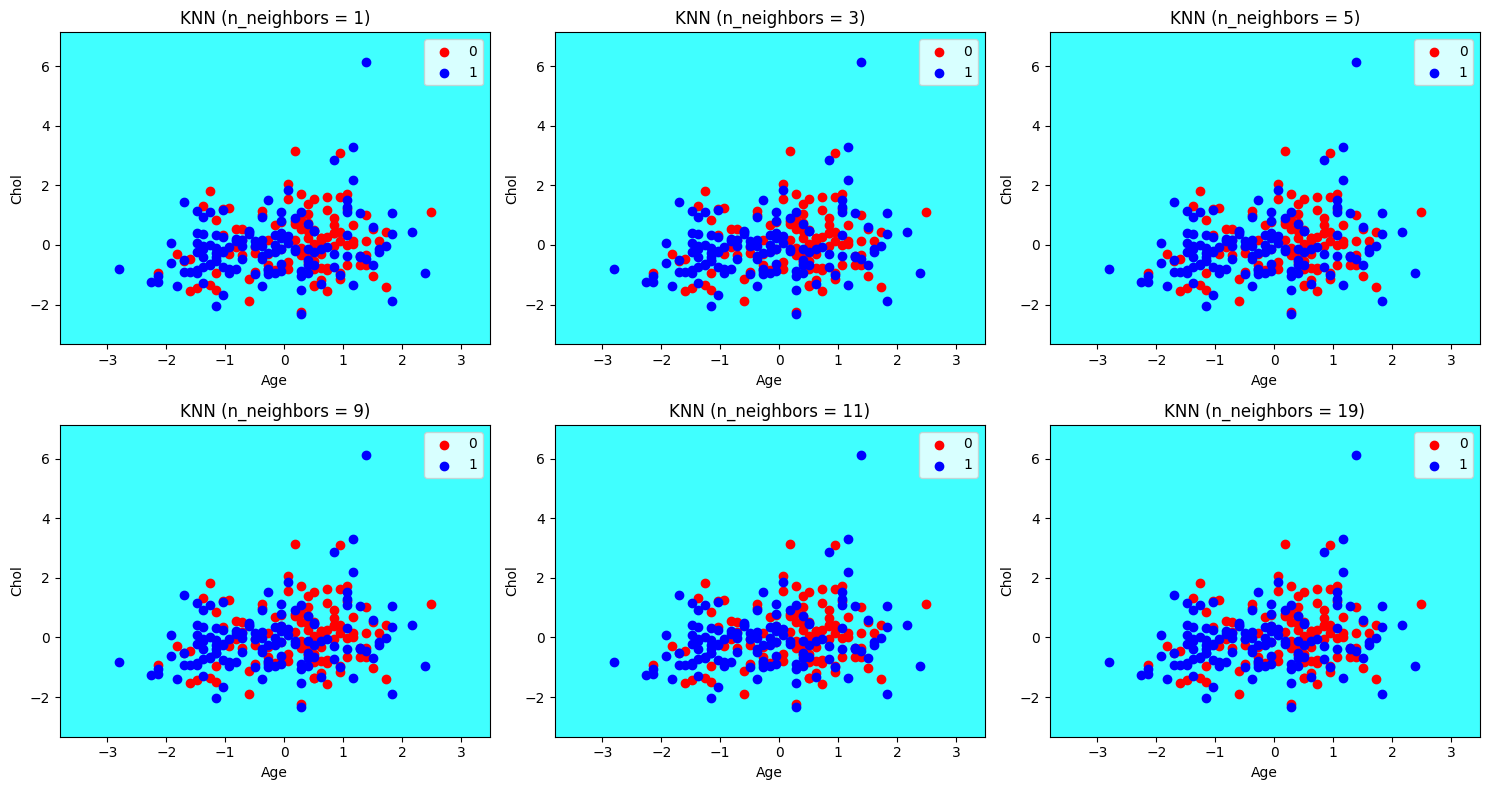

In [18]:
X = data.iloc[:, [0,4]].values
print(X.shape)
# Definindo a coluna 8 (Output) como preditivo
y = data.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Para o KNN
n_neighbors_values = [1, 3, 5, 9, 11, 19]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for i, n_neighbors in enumerate(n_neighbors_values):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="hamming")
    classifier.fit(X_train, y_train)

    # Gráfico para cada KNN
    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('cyan', 'gray')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Chol')
    ax.legend()

plt.tight_layout()

plt.show()

# Analisando overfitting e underfitting para idade e colesterol com distância de Minkowski

(302, 2)


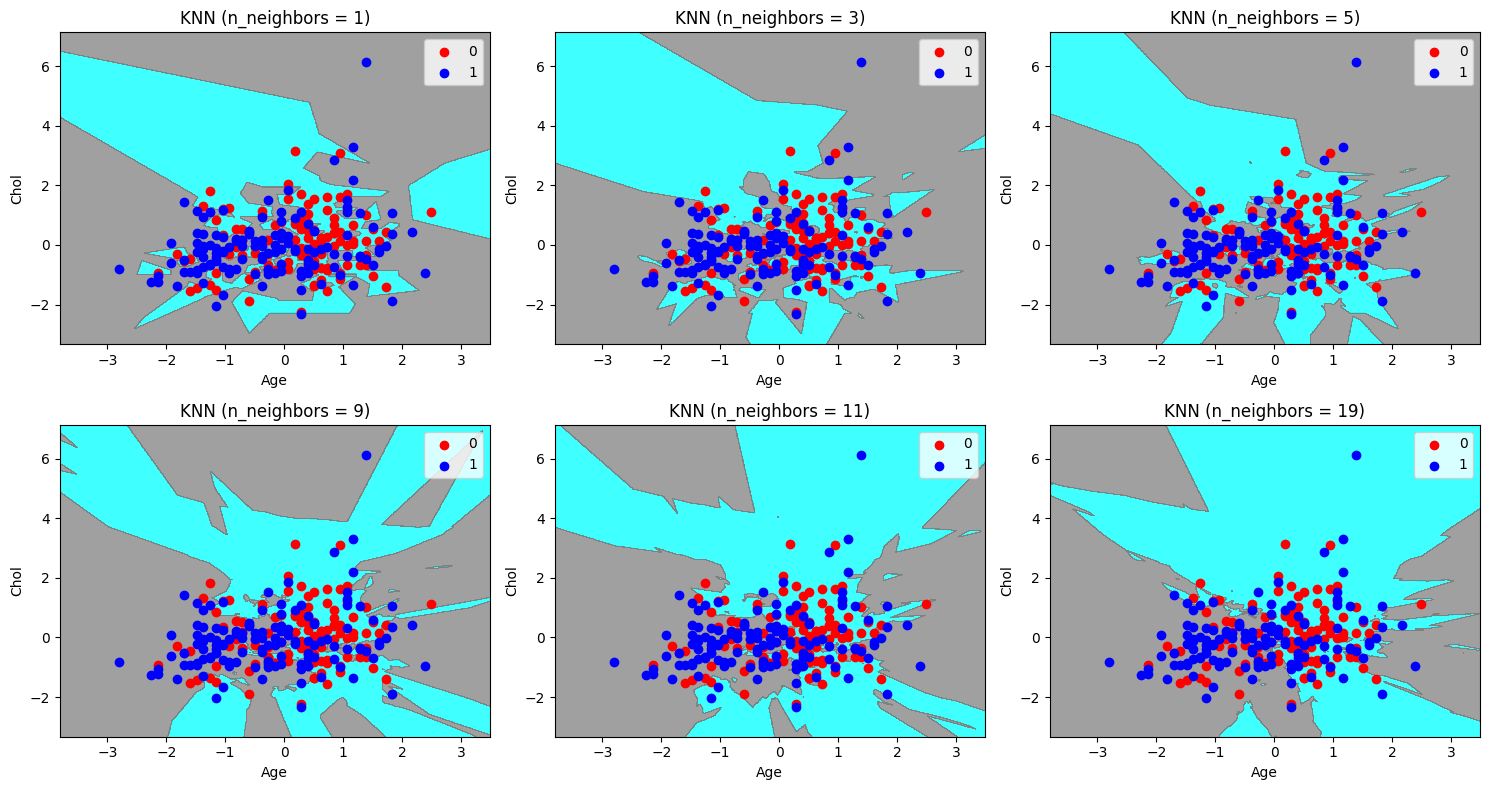

In [19]:
X = data.iloc[:, [0,4]].values
print(X.shape)
# Definindo a coluna 8 (Output) como preditivo
y = data.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Para o KNN
n_neighbors_values = [1, 3, 5, 9, 11, 19]


fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for i, n_neighbors in enumerate(n_neighbors_values):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="minkowski")
    classifier.fit(X_train, y_train)

    ax = axs[i // 3, i % 3]
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('cyan', 'gray')))
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())

    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Chol')
    ax.legend()

plt.tight_layout()

plt.show()

# Analisando métricas de avaliação com KFOLD = 5

(61,)


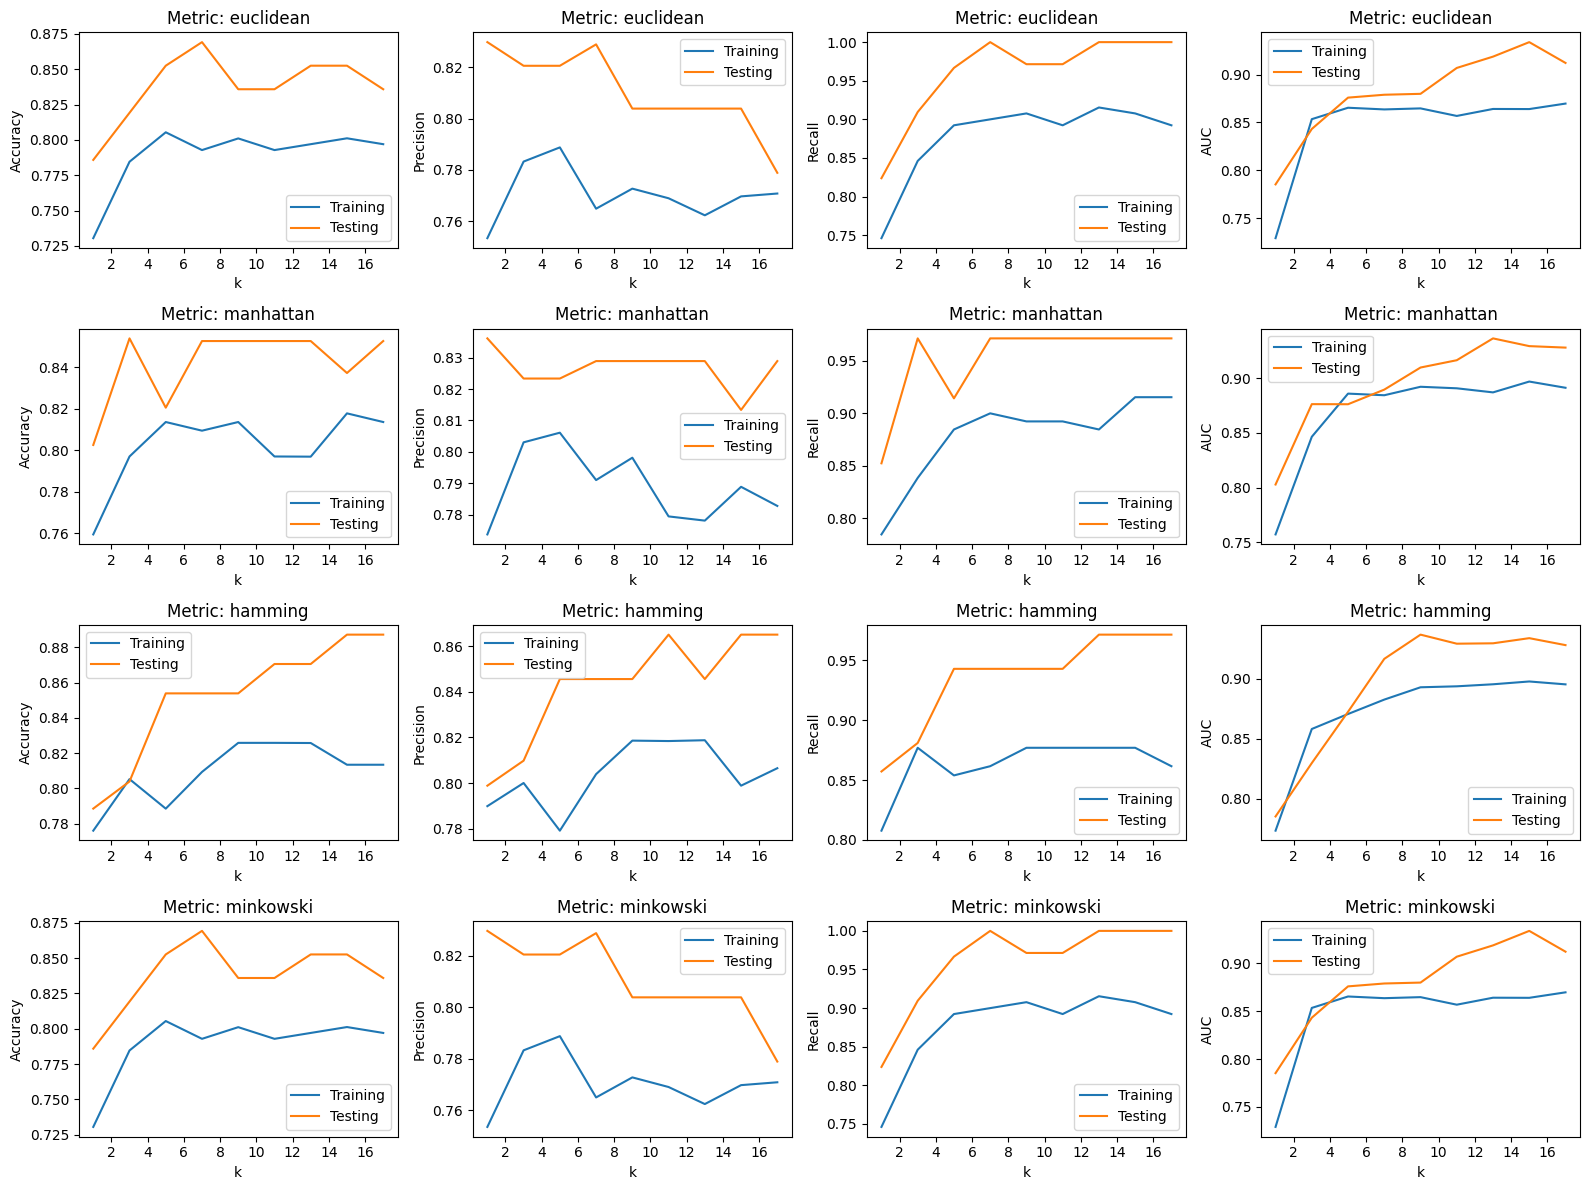

In [20]:
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(y_test.shape)
k_list = list(range(1,18,2))
neighbors = k_list
metrics = ['euclidean', 'manhattan', 'hamming', 'minkowski']
performance_measures = ['Accuracy', 'Precision', 'Recall', 'AUC']
performance_values_train = np.empty((len(metrics), len(performance_measures), len(neighbors)))
performance_values_test = np.empty((len(metrics), len(performance_measures), len(neighbors)))

for i, metric in enumerate(metrics):

    for j, measure in enumerate(performance_measures):

        for k, n in enumerate(neighbors):
            knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
            knn.fit(X_train, y_train)
            if measure == 'AUC':
                knn_ovr = OneVsRestClassifier(knn)
                scores_train = cross_val_score(knn_ovr, X_train, y_train, cv=5, scoring='roc_auc')
                scores_test = cross_val_score(knn_ovr, X_test, y_test, cv=5, scoring='roc_auc')

            else:
                scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring=measure.lower())
                scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring=measure.lower())

            performance_values_train[i, j, k] = np.mean(scores_train)
            performance_values_test[i, j, k] = np.mean(scores_test)

fig, axs = plt.subplots(len(metrics), len(performance_measures), figsize=(16, 12))
for i, metric in enumerate(metrics):
    for j, measure in enumerate(performance_measures):
        axs[i, j].plot(neighbors, performance_values_train[i, j], label='Training')
        axs[i, j].plot(neighbors, performance_values_test[i, j], label='Testing')
        axs[i, j].set_title(f'Metric: {metric}')
        axs[i, j].legend()
        axs[i, j].set_xlabel('k')
        axs[i, j].set_ylabel(measure)
        axs[i, j].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()



# Matriz de confusão com distância Euclidiana

De acordo com a acurácia e sensibilidade (recall), o melhor valor de k é 7

Existem 61 amostras para teste



Text(0.5, 23.52222222222222, 'Predicted')

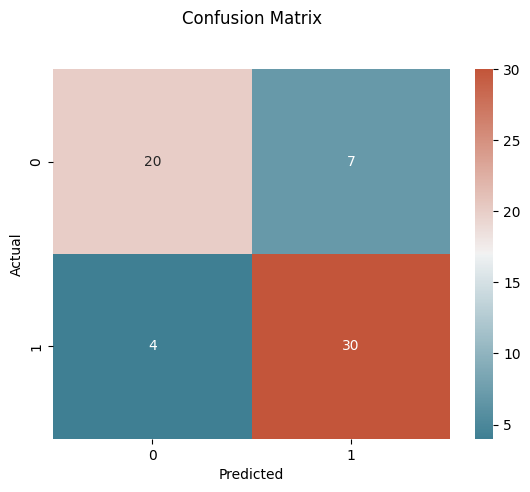

In [21]:
#Matriz de confusão
knn = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap=color ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')



*   Acurácia = 81.96%
*   Precisão = 81.08%
*   Sensibilidade = 88.23%



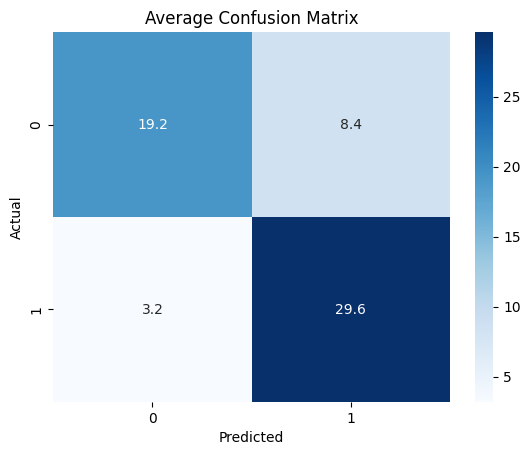

In [22]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=7, metric="euclidean")

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Matriz de confusão com KFOLD = 5
* Acurácia = 80.68%
* Precisão = 77.89%
* Sensibilidade = 90.24%




# Matriz de confusão com distância de Manhattan

Para distância de Manhattan, obteve-se melhor desempenho no geral com k = 7

Existem 60 amostras para teste



Text(0.5, 23.52222222222222, 'Predicted')

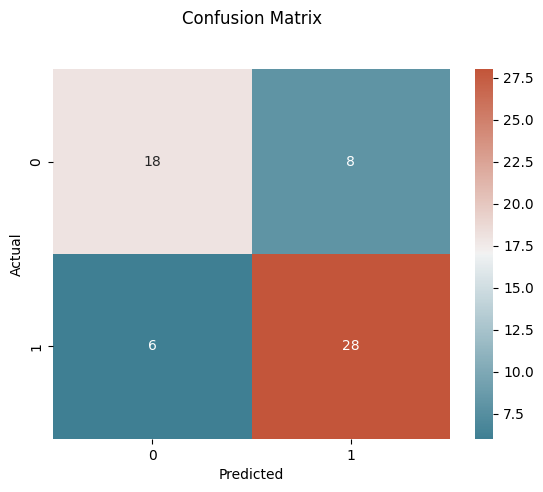

In [23]:
knn = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap=color ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

* Acurácia = 76.66%
* Precisão = 77.77%
* Sensibilidade = 82.35%

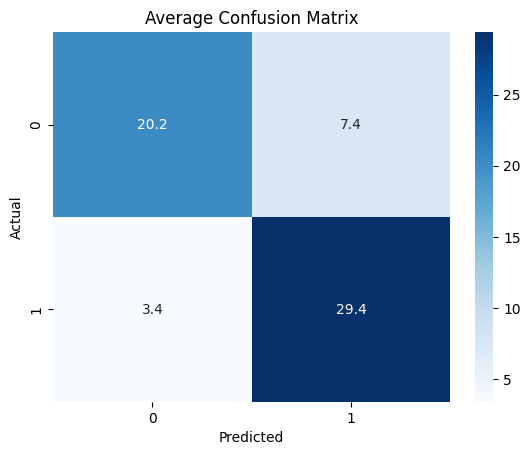

In [24]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=7, metric="manhattan")

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* Acurácia = 82.21%
* Precisão = 79.89%
* Sensibilidade = 89.63%

Utilizando KFOLD obteve-se melhor sensibilidade, detectando mais pessoas com a doença

# Matriz de confusão com distância de Hamming

Com K = 9 obteve-se o melhor desempenho para a distância de Hamming, com relação a sensibilidade

Existem 60 amostras para teste



Text(0.5, 23.52222222222222, 'Predicted')

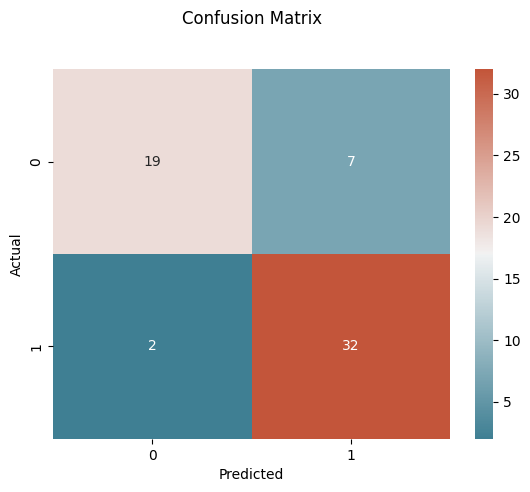

In [25]:
knn = KNeighborsClassifier(n_neighbors=9, metric="hamming")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap=color ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

* Acurácia = 85%
* Precisão = 82.05%
* Sensibilidade = 94.12%

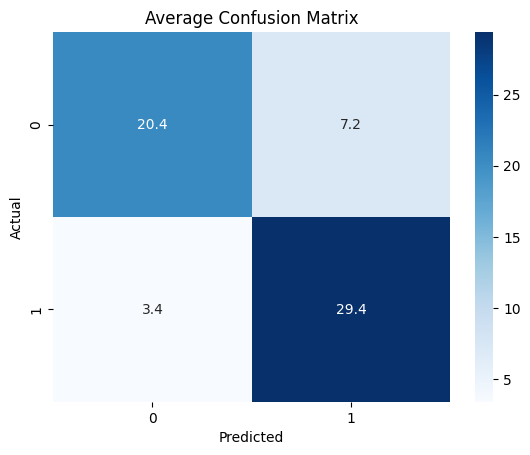

In [26]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=9, metric="hamming")

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* Acurácia = 82.45%
* Precisão = 80.32%
* Sensibilidade = 89.63%

O resultado sem a validação cruzada obteve, ligeiramente, melhor desempenho

# Matriz de confusão com distância de Minkowski

Com k=17 foi o melhor valor possível para esta métrica, perdendo um pouco em precisão mas ganhando em sensibilidade com validação cruzada.

Existem 60 amostras para teste



Text(0.5, 23.52222222222222, 'Predicted')

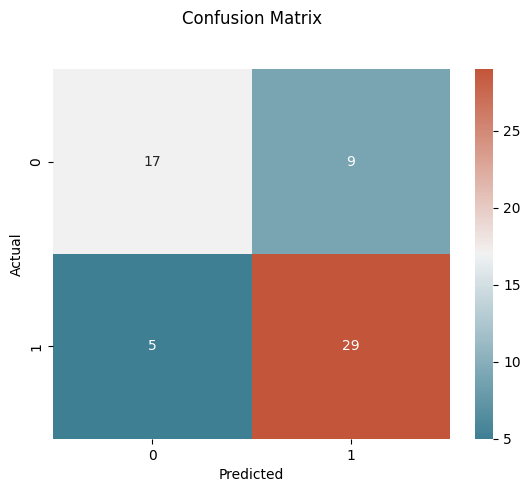

In [27]:
knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Existem ' + str(len(y_pred)) + ' amostras para teste\n')
matrix = confusion_matrix(y_test, y_pred)
color = sns.diverging_palette(220, 20, as_cmap=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap=color ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

* Acurácia = 75%
* Precisão = 75.67%
* Sensibilidade = 82.35%

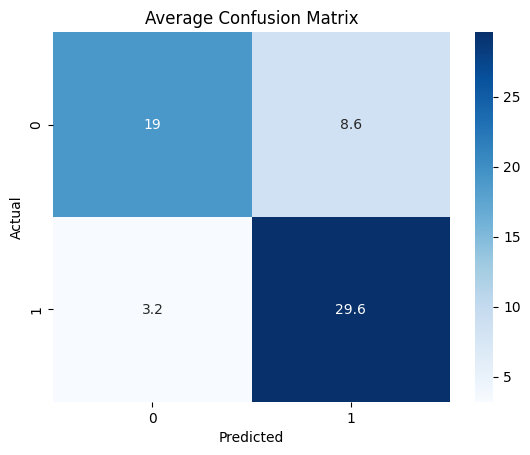

In [28]:
kfold = KFold(n_splits=5)
confusion_matrices = []

X = np.array(X)
y = np.array(y)
knn = KNeighborsClassifier(n_neighbors=17, metric='minkowski')

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)


sns.heatmap(avg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* Acurácia = 80.46%
* Precisão = 77.48%
* Sensibilidade = 90.24%